In [18]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [19]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [21]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [23]:
train_ds=keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.


In [24]:
valid_ds=keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 5000 files belonging to 2 classes.


In [25]:
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label
train_ds = train_ds.map(process)
valid_ds = valid_ds.map(process)

In [26]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=3,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=3,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=3,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 83, 83, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       1,327,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,428,801 (5.45 MB)

 Trainable params: 1,428,801 (5.45 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
history = model.fit(train_ds,epochs=10,validation_data=valid_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 60ms/step - accuracy: 0.6244 - loss: 0.6355 - val_accuracy: 0.7366 - val_loss: 0.5400
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 60ms/step - accuracy: 0.7611 - loss: 0.4922 - val_accuracy: 0.7942 - val_loss: 0.4368
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - accuracy: 0.8088 - loss: 0.4109 - val_accuracy: 0.8216 - val_loss: 0.3899
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.8571 - loss: 0.3300 - val_accuracy: 0.8350 - val_loss: 0.3881
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 60ms/step - accuracy: 0.8966 - loss: 0.2470 - val_accuracy: 0.8246 - val_loss: 0.4789
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.9331 - loss: 0.1599 - val_accuracy: 0.8200 - val_loss: 0.5478
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9617 - loss: 0.0977 - val_accuracy: 0.8192 - val_loss: 0.6921
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.9711 - loss: 0.0817 - 

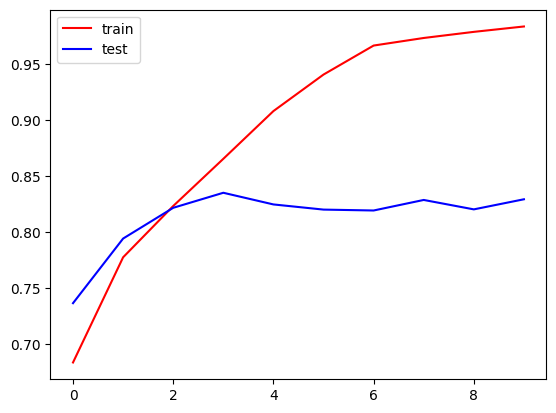

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()


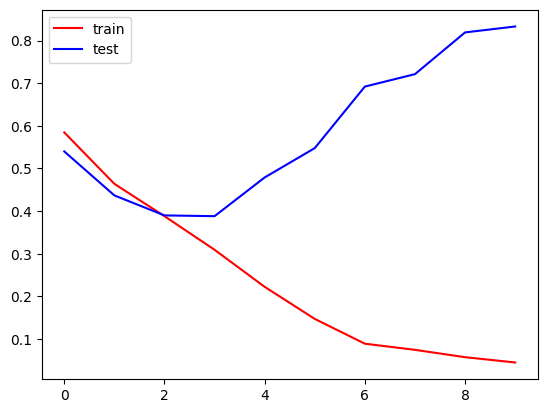

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [33]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog.9966.jpg')
plt.imshow(test_img)

In [38]:
test_img = cv2.resize(test_img,(256,256))

In [39]:
test_input = test_img.reshape((1,256,256,3))

In [40]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


array([[1.]], dtype=float32)

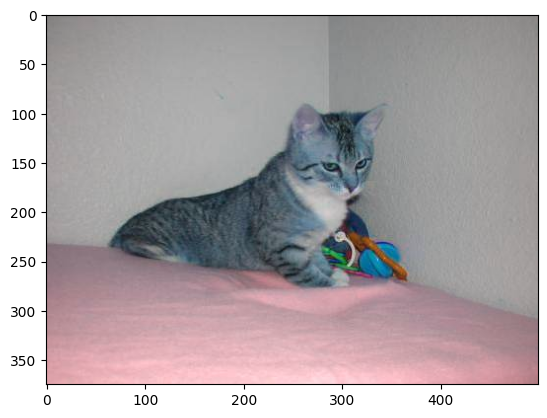

In [41]:
test_img = cv2.imread('/content/cat.9970.jpg')
plt.imshow(test_img)

In [42]:
test_img = cv2.resize(test_img,(256,256))

In [43]:
test_input = test_img.reshape((1,256,256,3))

In [44]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.]], dtype=float32)